___
# PROJETO 2

## Bruno Xavier Gomes
___

## Introdução

###### Reportagens:

Vídeo: https://www.youtube.com/watch?feature=player_embedded&v=jbkSRLYSojo (Acesso em 09 de abril de 2017)

Exame: http://exame.abril.com.br/mundo/aumenta-a-expectativa-de-vida-no-mundo/ (Acesso em 09 de abril de 2017)

Durante os últimos 200 anos o mundo mudou radicalmente, desde o surgimento de novas tecnologias até o grande avanço na medicina, e para perceber essa mudança podemos analisar a diferença entre a expectativa de vida dos países do mundo em 3 anos diferentes: 1888, ano da abolição da escravatura, 1939, ano de inicio da Segunda Guerra Mundial e 2010, que representa atualmente.

Este trabalho visa ver se a expectativa de vida nesses anos pode ser modelada por uma distribuição normal e se não puser, que distribuição deve ser usada.
_____

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


In [30]:
dados = pd.read_excel("C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\Aulas\\aula15\\Life.xlsx")

In [31]:
dados = dados.dropna(subset = ['A1888', 'A1939', 'A2010'])

In [32]:
df = pd.DataFrame()

___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [33]:
df['a1888'] = sorted(dados.A1888)
df['a1939'] = sorted(dados.A1939)
df['a2010'] = sorted(dados.A2010)

___
### Análise Descritiva

In [35]:
d1 = df.a1888.describe() # Medidas resumo do ano de 1888
d2 = df.a1939.describe() # Medidas resumo do ano de 1939
d3 = df.a2010.describe() # Medidas resumo do ano de 2010

print('Describe (1888):\n', d1, '\n\nDescribe (1939):\n', d2, '\n\nDescribe (2010):\n', d3)

Describe (1888):
 count    201.000000
mean      32.529872
std        5.564969
min       17.000000
25%       29.200000
50%       32.000000
75%       35.000000
max       52.350000
Name: a1888, dtype: float64 

Describe (1939):
 count    201.000000
mean      40.912561
std       10.958901
min       23.387000
25%       31.900000
50%       37.500000
75%       48.894769
max       67.730000
Name: a1939, dtype: float64 

Describe (2010):
 count    201.000000
mean      70.807920
std        8.697194
min       37.000000
25%       64.500000
50%       73.400000
75%       77.600000
max       83.000000
Name: a2010, dtype: float64


Calculando as medidas resumos pode-se perceber a grande diferença entre os anos, principalmente ao olhar para a média, valor mínimo e máximo, pois nota-se a grande diferença entre as expectativas de vida. Também vale perceber os quartis (25%, 50% e 75%), pois estes mostam que as expectativas de vida do ano de 1939 sempre foram melhores que a de 1888, e o mesmo acontece com o ano de 2010 sendo melhor que 1939.

Ao analisar as medidas podemos também notar os desvios (std), sendo menores em 1888 e 2010 devido a baixa e alta qualidade de vida no geral, e maior no ano de 1939 por estar no periodo de transição entre os outros dois anos, ainda possuindo algumas pessoas que possuem baixa expectativa mas já começando a ter algumas que vivem mais tempo.

In [36]:
k = 14
a = (83 - 17)/k

faixa = np.arange(17, 83, a)

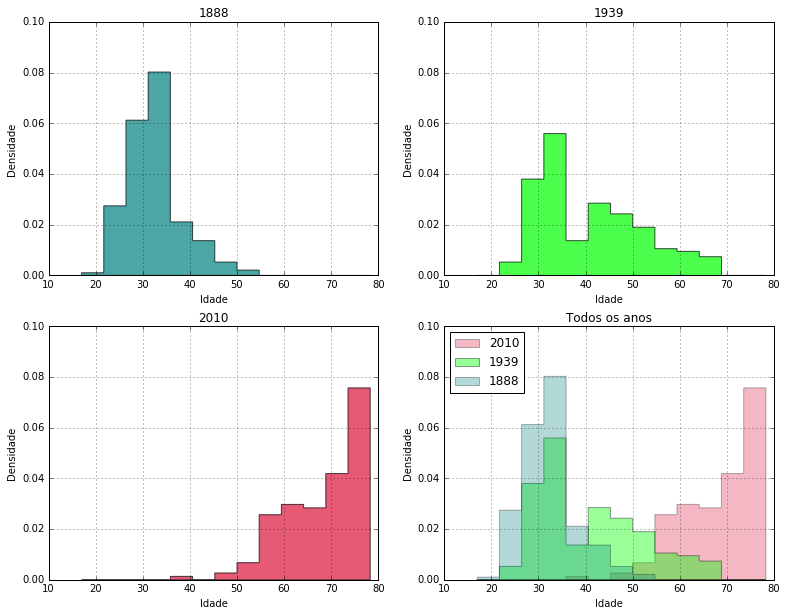

In [37]:
fig = plt.figure(figsize = (13, 10))

#===================================================================================================================
# Ano de 1888

plt.subplot(221)
plot = df.a1888.plot.hist(bins = faixa, title = '1888', figsize = (13, 10), alpha = 0.7, color = 'teal', normed = 1,
                         histtype = 'stepfilled', grid = True)
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Ano de 1939

plt.subplot(222)
plot = df.a1939.plot.hist(bins = faixa, title = '1939', figsize = (13, 10), alpha = 0.7, color = 'lime', normed = 1,
                         histtype = 'stepfilled', grid = True)
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Ano de 2010

plt.subplot(223)
plot = df.a2010.plot.hist(bins = faixa, title = '2010', figsize = (13, 10), alpha = 0.7, color = 'crimson', normed = 1,
                         histtype = 'stepfilled', grid = True)
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Todos os Anos

plt.subplot(224)
plot = df.a2010.plot.hist(bins = faixa, figsize = (13, 10), alpha = 0.3, color = 'crimson', normed = 1, 
                          histtype = 'stepfilled', label = '2010', grid = True)
plot = df.a1939.plot.hist(bins = faixa, figsize = (13, 10), alpha = 0.4, color = 'lime', normed = 1, 
                          histtype = 'stepfilled', label = '1939', grid = True)
plot = df.a1888.plot.hist(bins = faixa, figsize = (13, 10), alpha = 0.3, color = 'teal', normed = 1, 
                          histtype = 'stepfilled', label = '1888', grid = True)
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.title('Todos os anos')
plt.ylim(0, 0.1)

# Legenda
ax = plt.subplot(224)
ax.legend(('2010', '1939', '1888'), loc = 'upper left')

Ao montar os histogramas pode-se perceber exatamente o que foi analisado nas medidas resumo, além de que ambos anos de 1888 e 1939 posuem assimetria a direita e o ano de 2010 a esquerda, devido aos fatores citados anteriormente. Conclui-se então que nenhuma das distribuições dos dados se assememlha a normal simétrica.

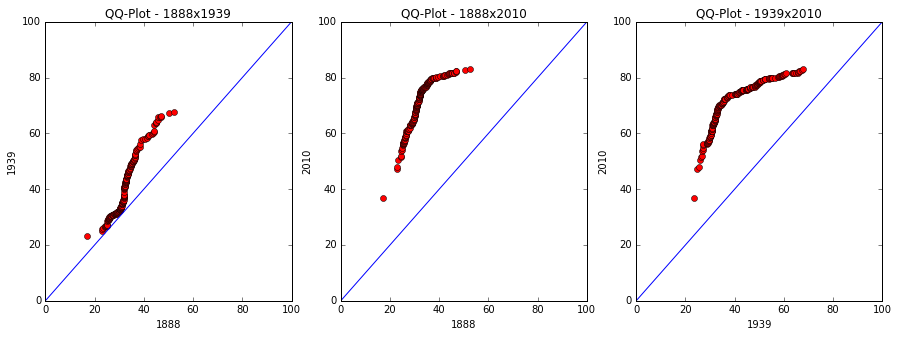

In [38]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(df.a1888, df.a1939, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('QQ-Plot - 1888x1939')
plt.xlabel('1888')
plt.ylabel('1939')

plt.subplot(132)
plt.plot(df.a1888, df.a2010, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('QQ-Plot - 1888x2010')
plt.xlabel('1888')
plt.ylabel('2010')

plt.subplot(133)
plt.plot(df.a1939, df.a2010, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('QQ-Plot - 1939x2010')
plt.xlabel('1939')
plt.ylabel('2010')

Pelos gráficos de QQ-Plot consegue-se entender melhor as mudanças nas expectativas de vida dos diferentes anos, pois mostra as diferenças entre elas de maneira a facilitar a comparação.

Pode-se perceber que o número de países com expectativa de vida até os 35 anos em 1939 e 1888 são próximos, porém depois disso começam a se diferenciar muito, tendo mais países com expectativas altas em 1939. Já as comparaçòes que envolvem o ano de 2010 são semelhantes, pois a expectativa de vida nesse ano é tão mais alta que a dos outros dois que os gráficos ficam parecidos, porém ainda dá para perceber que o ano de 1939, no geral, tem mais países com expectativa de vida alta do que em 1888.

### Aderência de um modelo probabilístico normal aos dados

In [39]:
mu1 = df.a1888.mean()
mu2 = df.a1939.mean()
mu3 = df.a2010.mean()

sigma1 = (df.a1888.var())**0.5
sigma2 = (df.a1939.var())**0.5
sigma3 = (df.a2010.var())**0.5

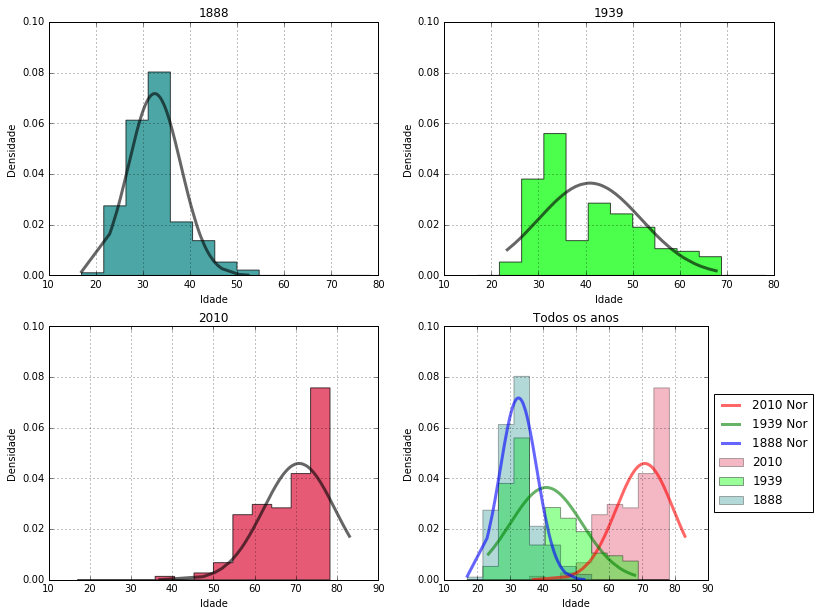

In [40]:
fig = plt.figure(figsize = (13, 10))

#===================================================================================================================
# Ano de 1888

plt.subplot(221)
plot = df.a1888.plot.hist(bins = faixa, title = '1888', figsize = (13, 10), alpha = 0.7, color = 'teal', normed = 1, 
                          histtype = 'stepfilled', grid = True)
plt.plot(df.a1888, stats.norm.pdf(df.a1888, loc = mu1, scale = sigma1), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Ano de 1939

plt.subplot(222)
plot = df.a1939.plot.hist(bins = faixa, title = '1939', figsize = (13, 10), alpha = 0.7, color = 'lime', normed = 1,
                         histtype = 'stepfilled', grid = True)
plt.plot(df.a1939, stats.norm.pdf(df.a1939, loc = mu2, scale = sigma2), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Ano de 2010

plt.subplot(223)
plot = df.a2010.plot.hist(bins = faixa, title = '2010', figsize = (13, 10), alpha = 0.7, color = 'crimson', normed = 1,
                         histtype = 'stepfilled', grid = True)
plt.plot(df.a2010, stats.norm.pdf(df.a2010, loc = mu3, scale = sigma3), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Todos os Anos

plt.subplot(224)
plot = df.a2010.plot.hist(bins = faixa, figsize = (13, 10), alpha = 0.3, color = 'crimson', normed = 1,
                          histtype = 'stepfilled', grid = True)
plt.plot(df.a2010, stats.norm.pdf(df.a2010, loc = mu3, scale = sigma3), lw = 3, alpha = 0.6, color = 'red')

plot = df.a1939.plot.hist(bins = faixa, figsize = (13, 10), alpha = 0.4, color = 'lime', normed = 1,
                          histtype = 'stepfilled', grid = True)
plt.plot(df.a1939, stats.norm.pdf(df.a1939, loc = mu2, scale = sigma2), lw = 3, alpha = 0.6, color = 'green')

plot = df.a1888.plot.hist(bins = faixa, figsize = (13, 10), alpha = 0.3, color = 'teal', normed = 1,
                          histtype = 'stepfilled', grid = True)
plt.plot(df.a1888, stats.norm.pdf(df.a1888, loc = mu1, scale = sigma1), lw = 3, alpha = 0.6, color = 'blue')

plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.title('Todos os anos')
plt.ylim(0, 0.1)

# Legenda
ax = plt.subplot(224)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(('2010 Nor', '1939 Nor', '1888 Nor', '2010', '1939', '1888'), loc = 'center left', bbox_to_anchor = (1, 0.5))

Após a tentativa de modelar os dados por uma distribuição normal, visualmente pode-se perceber que essa distribuição não é uma boa representação.

In [41]:
fra = []
for i in range (1, 202):
    fra.append ((i - 0.5)/201)

In [42]:
q1888 = [] # quantis teoricos da distribuição normal 1888
for i in fra:
    q1888.append(stats.norm.ppf(i, loc = mu1, scale = sigma1))

q1939 = [] # quantis teoricos da distribuição normal 1939
for i in fra:
    q1939.append(stats.norm.ppf(i, loc = mu2, scale = sigma2))
    
q2010 = [] # quantis teoricos da distribuição normal 2010
for i in fra:
    q2010.append(stats.norm.ppf(i, loc = mu3, scale = sigma3))

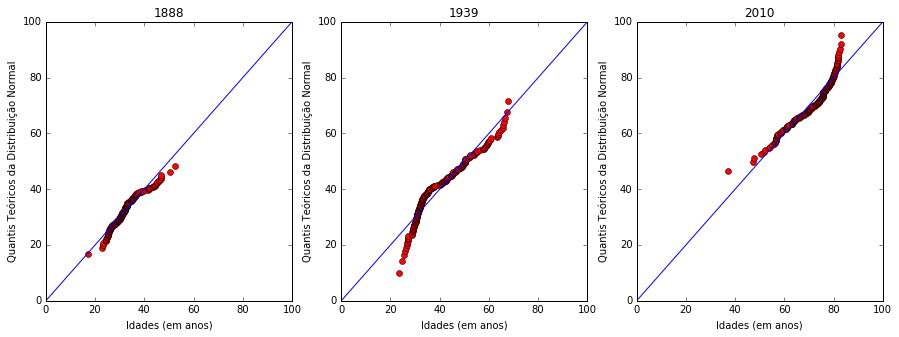

In [43]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(df.a1888, q1888, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('1888')
plt.xlabel('Idades (em anos)')
plt.ylabel('Quantis Teóricos da Distribuição Normal')

plt.subplot(132)
plt.plot(df.a1939, q1939, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('1939')
plt.xlabel('Idades (em anos)')
plt.ylabel('Quantis Teóricos da Distribuição Normal')

plt.subplot(133)
plt.plot(df.a2010, q2010, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('2010')
plt.xlabel('Idades (em anos)')
plt.ylabel('Quantis Teóricos da Distribuição Normal')

In [44]:
pa1888 = [] # Probabilidade Acumulada 1888
for i in df.a1888:
    pa1888.append(stats.norm.cdf(i, loc = mu1, scale = sigma1))
    
pa1939 = [] # # Probabilidade Acumulada 1939
for i in df.a1939:
    pa1939.append(stats.norm.cdf(i, loc = mu2, scale = sigma2))
    
pa2010 = [] # # Probabilidade Acumulada 2010
for i in df.a2010:
    pa2010.append(stats.norm.cdf(i, loc = mu3, scale = sigma3))

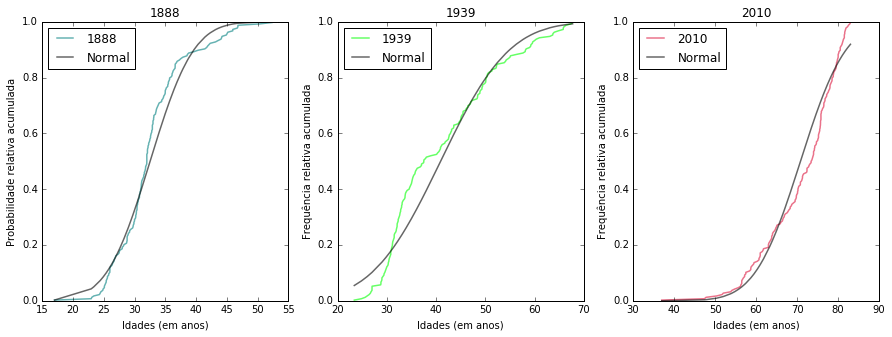

In [45]:
plt.figure(figsize = (15, 5))

#===================================================================================================================
# Ano de 1888

plt.subplot(131)
plt.plot(df.a1888, fra, lw = 1.5, color = 'teal', alpha = 0.6)
plt.plot(df.a1888, pa1888, lw = 1.5, color = 'black', alpha = 0.6)
plt.title('1888')
plt.xlabel('Idades (em anos)')
plt.ylabel('Probabilidade relativa acumulada')

ax = plt.subplot(131)
ax.legend(('1888', 'Normal'), loc = 'upper left')

#===================================================================================================================
# Ano de 1939

plt.subplot(132)
plt.plot(df.a1939, fra, lw = 1.5, color = 'lime', alpha = 0.6)
plt.plot(df.a1939, pa1939, lw = 1.5, color = 'black', alpha = 0.6)
plt.title('1939')
plt.xlabel('Idades (em anos)')
plt.ylabel('Frequência relativa acumulada')

ax = plt.subplot(132)
ax.legend(('1939', 'Normal'), loc = 'upper left')

#===================================================================================================================
# Ano de 2010

plt.subplot(133)
plt.plot(df.a2010, fra, lw = 1.5, color = 'crimson', alpha = 0.6)
plt.plot(df.a2010, pa2010, lw = 1.5, color = 'black', alpha = 0.6)
plt.title('2010')
plt.xlabel('Idades (em anos)')
plt.ylabel('Frequência relativa acumulada')

ax = plt.subplot(133)
ax.legend(('2010', 'Normal'), loc = 'upper left')

Após analisar os gráficos feitos, fica ainda mais claro que as bases de dados não podem ser bem modeladas pela distribuição normal.

___
### Aderência de um modelo probabilístico assimétrico aos dados

(0, 0.1)

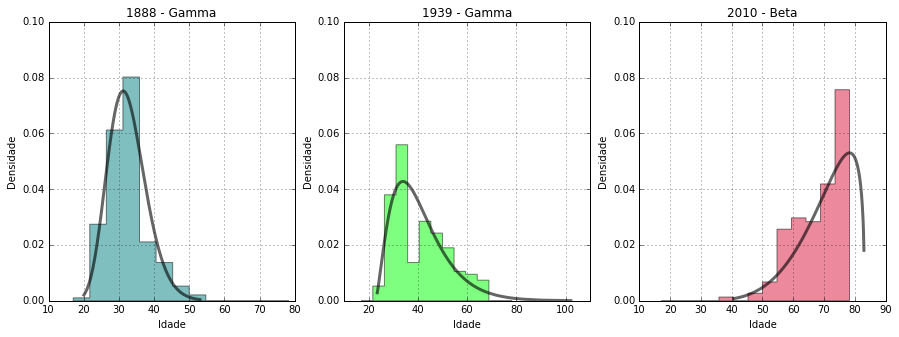

In [46]:
plt.figure(figsize = (15, 5))

a1, l1, s1 = stats.gamma.fit(df.a1888)
a2, l2, s2 = stats.gamma.fit(df.a1939)
a3, b, l3, s3 = stats.beta.fit(df.a2010)

#===================================================================================================================
# Ano de 1888

plt.subplot(131)
x = sorted(stats.gamma.rvs(a1, size = 1000, loc = l1, scale = s1))
plt.plot(x, stats.gamma.pdf(x, a = a1, loc = l1, scale = s1), lw = 3, alpha = 0.6, color = 'Black')
df.a1888.hist(bins = faixa, color = "teal", alpha = 0.5, normed = 1, histtype = 'stepfilled')
plt.title('1888 - Gamma')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Ano de 1939

plt.subplot(132)
x = sorted(stats.gamma.rvs(a2, size = 1000, loc = l2, scale = s2))
plt.plot(x, stats.gamma.pdf(x, a = a2, loc = l2, scale = s2), lw = 3, alpha = 0.6, color = 'Black')
df.a1939.hist(bins = faixa, color = "lime", alpha = 0.5, normed = 1, histtype = 'stepfilled')
plt.title('1939 - Gamma')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

#===================================================================================================================
# Ano de 2010

plt.subplot(133)
x = sorted(stats.beta.rvs(a3, b, size = 1000, loc = l3, scale = s3)) # scale = 54 (para ambos acabarem próximos)
plt.plot(x, stats.beta.pdf(x, a = a3, b = b, loc = l3, scale = s3), lw = 3, alpha = 0.6, color = 'Black')
df.a2010.hist(bins = faixa, color = "crimson", alpha = 0.5, normed = 1, histtype = 'stepfilled')
plt.title('2010 - Beta')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

Visualmente percebe-se que as novas distribuições adotadas são mais adequadas para modelar as bases de dados do que a normal, sendo elas: gamma para 1888 e 1939 e a beta para 2010.

In [47]:
q1888 = [] # quantis teoricos da distribuição normal 1888
for i in fra:
    q1888.append(stats.gamma.ppf(i, a = a1, loc = l1, scale = s1))

q1939 = [] # quantis teoricos da distribuição normal 1939
for i in fra:
    q1939.append(stats.gamma.ppf(i, a = a2, loc = l2, scale = s2))
    
q2010 = [] # quantis teoricos da distribuição normal 2010
for i in fra:
    q2010.append(stats.beta.ppf(i, a = a3, b = b, loc = l3, scale = s3))

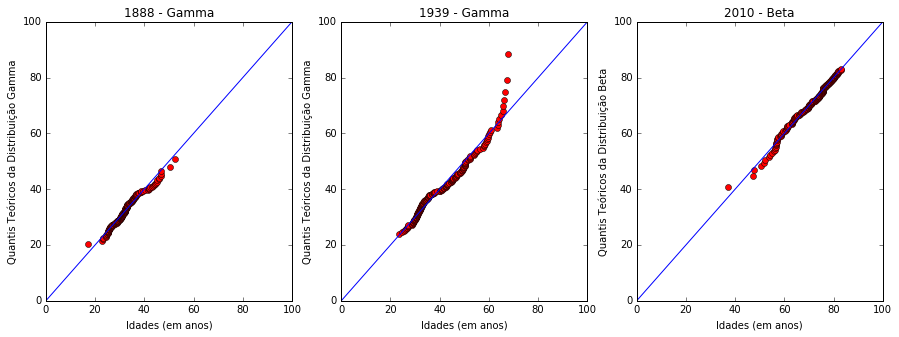

In [48]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(df.a1888, q1888, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('1888 - Gamma')
plt.xlabel('Idades (em anos)')
plt.ylabel('Quantis Teóricos da Distribuição Gamma')

plt.subplot(132)
plt.plot(df.a1939, q1939, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('1939 - Gamma')
plt.xlabel('Idades (em anos)')
plt.ylabel('Quantis Teóricos da Distribuição Gamma')

plt.subplot(133)
plt.plot(df.a2010, q2010, 'ro')
plt.plot((0, 100), (0, 100))
plt.title('2010 - Beta')
plt.xlabel('Idades (em anos)')
plt.ylabel('Quantis Teóricos da Distribuição Beta')

In [49]:
pa1888 = [] # Probabilidade Acumulada 1888
for i in df.a1888:
    pa1888.append(stats.gamma.cdf(i, a = a1, loc = l1, scale = s1))
    
pa1939 = [] # # Probabilidade Acumulada 1939
for i in df.a1939:
    pa1939.append(stats.gamma.cdf(i, a = a2, loc = l2, scale = s2))
    
pa2010 = [] # # Probabilidade Acumulada 2010
for i in df.a2010:
    pa2010.append(stats.beta.cdf(i, a = a3, b = b, loc = l3, scale = s3))

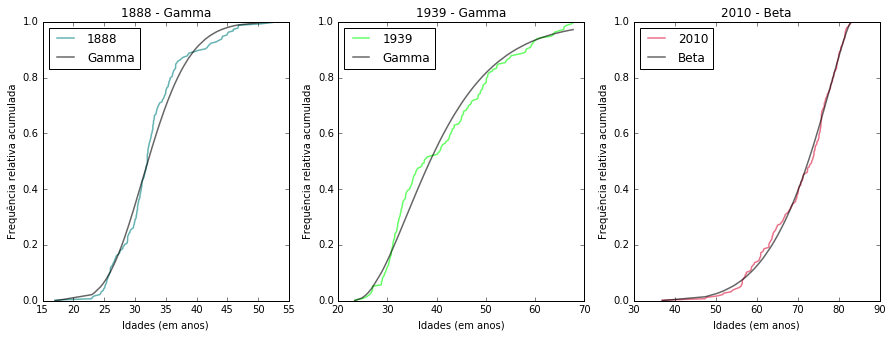

In [50]:
plt.figure(figsize = (15, 5))

#===================================================================================================================
# Ano de 1888

plt.subplot(131)
plt.plot(df.a1888, fra, lw = 1.5, color = 'teal', alpha = 0.6)
plt.plot(df.a1888, pa1888, lw = 1.5, color = 'black', alpha = 0.6)
plt.title('1888 - Gamma')
plt.xlabel('Idades (em anos)')
plt.ylabel('Frequência relativa acumulada')

ax = plt.subplot(131)
ax.legend(('1888', 'Gamma'), loc = 'upper left')

#===================================================================================================================
# Ano de 1939

plt.subplot(132)
plt.plot(df.a1939, fra, lw = 1.5, color = 'lime', alpha = 0.6)
plt.plot(df.a1939, pa1939, lw = 1.5, color = 'black', alpha = 0.6)
plt.title('1939 - Gamma')
plt.xlabel('Idades (em anos)')
plt.ylabel('Frequência relativa acumulada')

ax = plt.subplot(132)
ax.legend(('1939', 'Gamma'), loc = 'upper left')

#===================================================================================================================
# Ano de 2010

plt.subplot(133)
plt.plot(df.a2010, fra, lw = 1.5, color = 'crimson', alpha = 0.6)
plt.plot(df.a2010, pa2010, lw = 1.5, color = 'black', alpha = 0.6)
plt.title('2010 - Beta')
plt.xlabel('Idades (em anos)')
plt.ylabel('Frequência relativa acumulada')

ax = plt.subplot(133)
ax.legend(('2010', 'Beta'), loc = 'upper left')

Após analisar os novos gráficos, nota-se que mesmo não sendo perfeito, as novas distribuição são boas o suficiente para modelar de maneira aceitável as bases de dados.

___
### Cálculo de probabilidades a partir da distribuição normal

In [51]:
print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 1888 é:', 
      1 - (stats.norm.cdf(70, loc = mu1, scale = sigma1)), '\n')

print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 1939 é:', 
      1 - (stats.norm.cdf(70, loc = mu2, scale = sigma2)), '\n')

print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 2010 é:', 
      1 - (stats.norm.cdf(70, loc = mu3, scale = sigma3)))

Probabilidade de um país ter expectativa de vida superior a 70 anos em 1888 é: 8.29769586375e-12 

Probabilidade de um país ter expectativa de vida superior a 70 anos em 1939 é: 0.00397448576558 

Probabilidade de um país ter expectativa de vida superior a 70 anos em 2010 é: 0.537006261633


In [52]:
# P(x<75|x>70) = P(70<x<75)/P(x>70)

A1 = stats.norm.cdf(75, loc = mu1, scale = sigma1)
A2 = stats.norm.cdf(70, loc = mu1, scale = sigma1)

B1 = stats.norm.cdf(75, loc = mu2, scale = sigma2)
B2 = stats.norm.cdf(70, loc = mu2, scale = sigma2)

C1 = stats.norm.cdf(75, loc = mu3, scale = sigma3)
C2 = stats.norm.cdf(70, loc = mu3, scale = sigma3)

print('Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1888:', 
      ((A1 - A2)/(1 - A2)), '\n')

print('Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1939:', 
      ((B1 - B2)/(1 - B2)), '\n')

print('Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 2010:', 
      ((C1 - C2)/(1 - C2)))

Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1888: 0.998608490882 

Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1939: 0.765021555151 

Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 2010: 0.413597774474


In [53]:
A4 = stats.norm.ppf(0.1, loc = mu1, scale = sigma1)
B4 = stats.norm.ppf(0.1, loc = mu2, scale = sigma2)
C4 = stats.norm.ppf(0.1, loc = mu3, scale = sigma3)

print('A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1888 é:', A4, 'anos\n')
print('A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1939 é:', B4, 'anos\n')
print('A maior expectativa de vida dos 10% de países com menores expectativas de vida em 2010 é:', C4, 'anos')

A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1888 é: 25.3980774689 anos

A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1939 é: 26.8681647111 anos

A maior expectativa de vida dos 10% de países com menores expectativas de vida em 2010 é: 59.6620175175 anos


In [54]:
A5 = stats.norm.ppf(0.9, loc = mu1, scale = sigma1)
B5 = stats.norm.ppf(0.9, loc = mu2, scale = sigma2)
C5 = stats.norm.ppf(0.9, loc = mu3, scale = sigma3)

print('A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1888 é:', A5, 'anos\n')
print('A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1939 é:', B5, 'anos\n')
print('A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 2010 é:', C5, 'anos')

A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1888 é: 39.6616660519 anos

A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1939 é: 54.9569574879 anos

A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 2010 é: 81.9538232785 anos
